In [15]:
import sys
from rasterio.crs import CRS
from rasterio.warp import Resampling, reproject
import rioxarray as rxr
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
import emit_tools

In [3]:
#set filename for emit data
emit_filename = '/Users/spai/Downloads/EMIT_newdata_EMIT_L2A_RFL_001_20230504T091727_2312406_026.nc'

In [4]:
#get emit data
ds_emit = emit_tools.emit_xarray(emit_filename, ortho=True)

In [5]:
#show data info from rio
ds_emit.rio.crs
ds_emit.rio.bounds()

(26.6927463046597, -27.4535562546975, 28.28474098413239, -25.8480057622184)

In [6]:
#get landsat data
landsat = rxr.open_rasterio('/Users/spai/Downloads/Landsat_newdata_GFCC30TC_p171r078_TC_2015/p171r078_TC_2015.tif',masked=True).squeeze()

In [7]:
#set water to NA, anything >100 will be set to NA
landsat_nowater = landsat.where(landsat <= 100)

In [8]:
#reproject treecover (bilinear interpolation) and match emit data
landsat_emitCRS = landsat_nowater.rio.reproject_match(ds_emit, resampling=Resampling.bilinear)

0


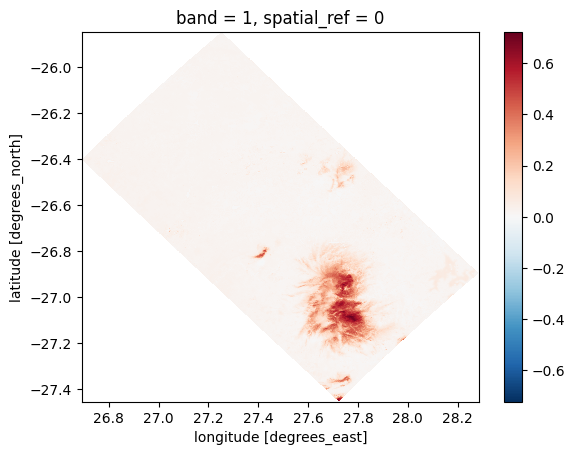

10


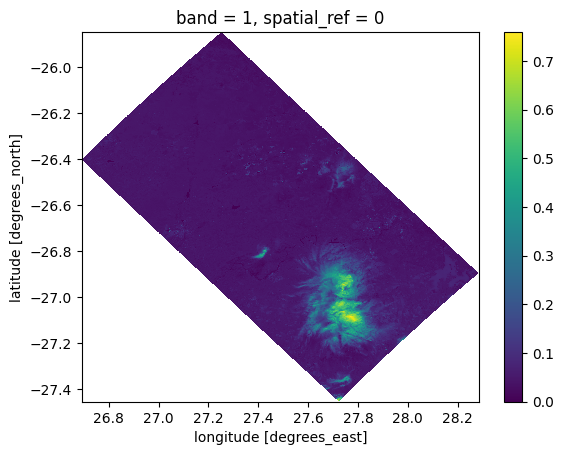

20


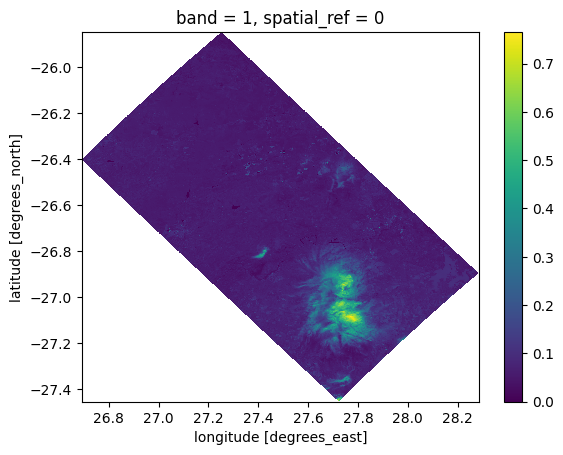

30


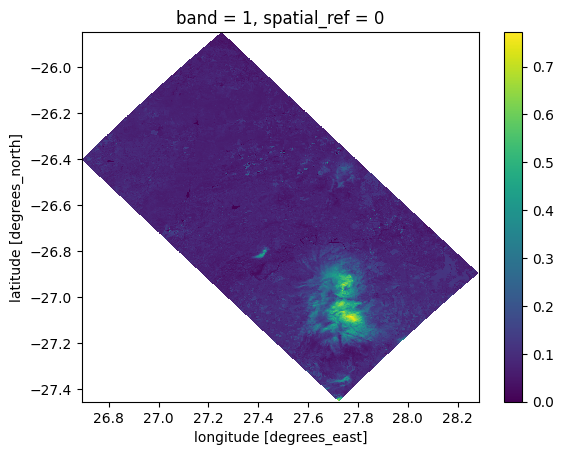

40


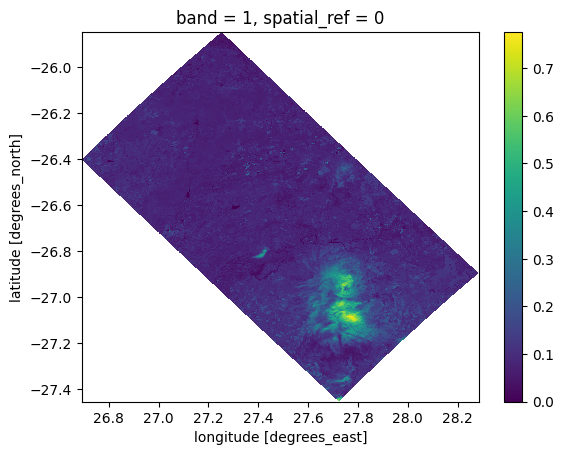

50


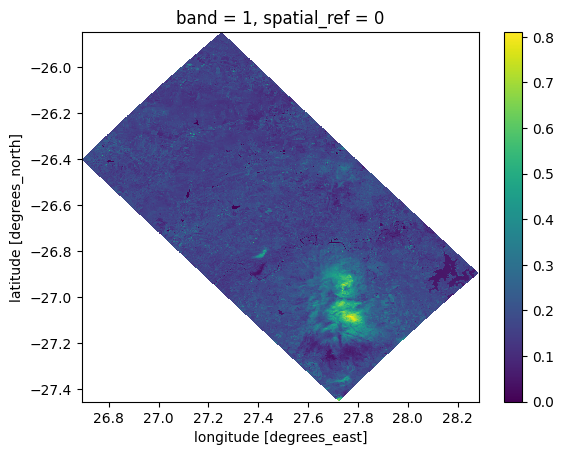

60


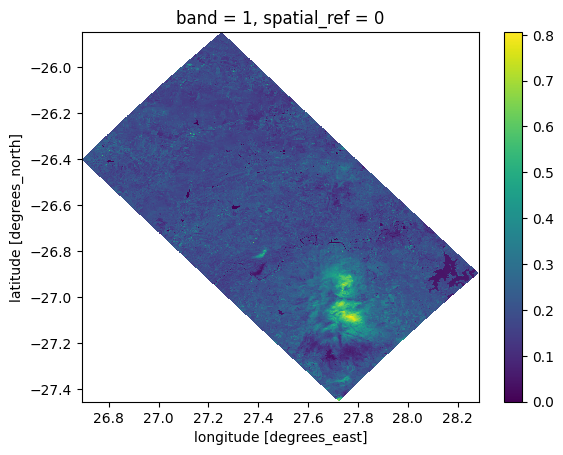

70


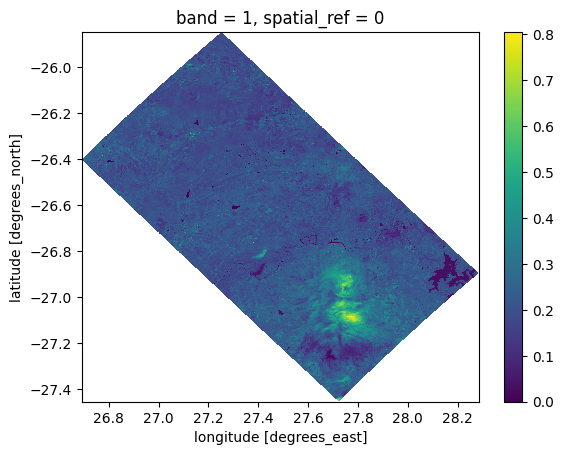

80


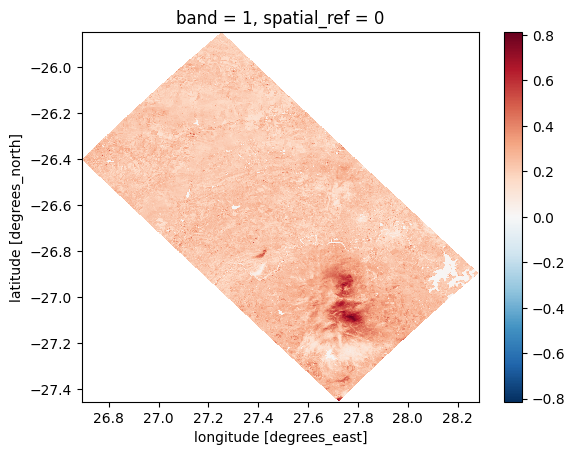

90


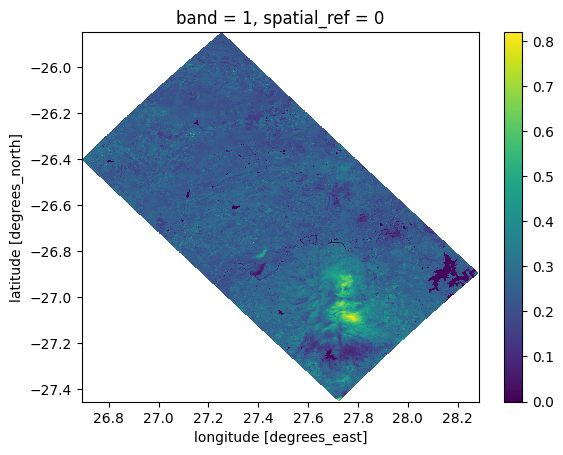

100


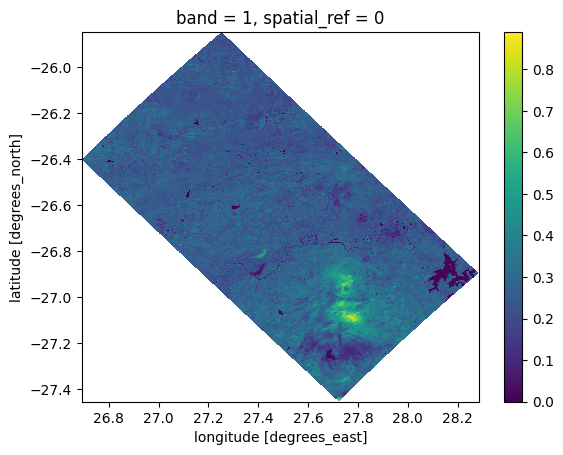

110


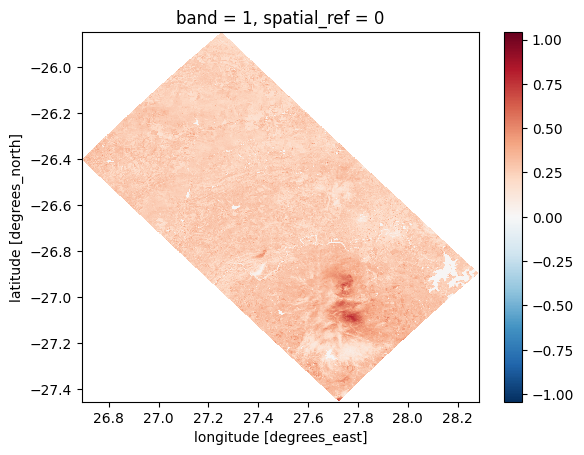

120


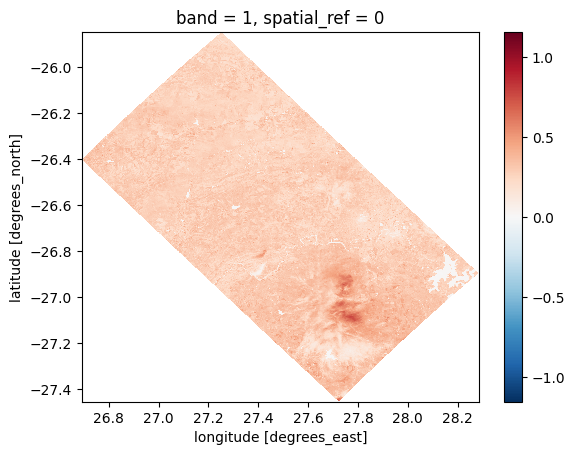

130


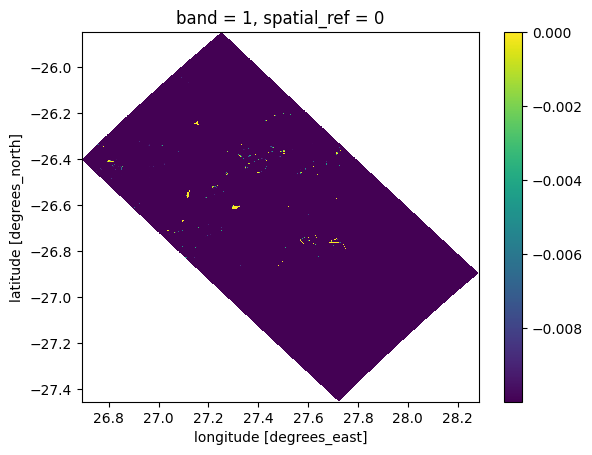

140


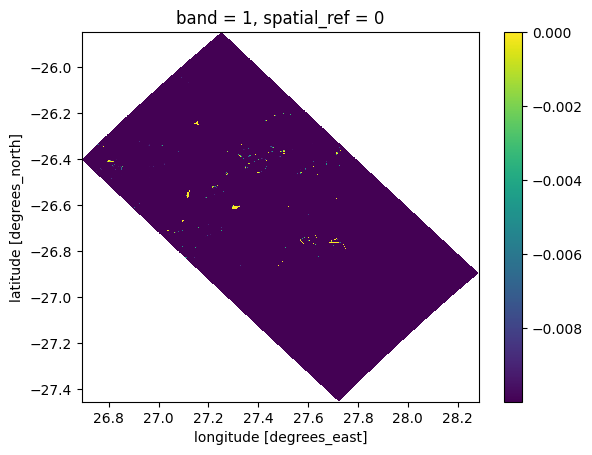

150


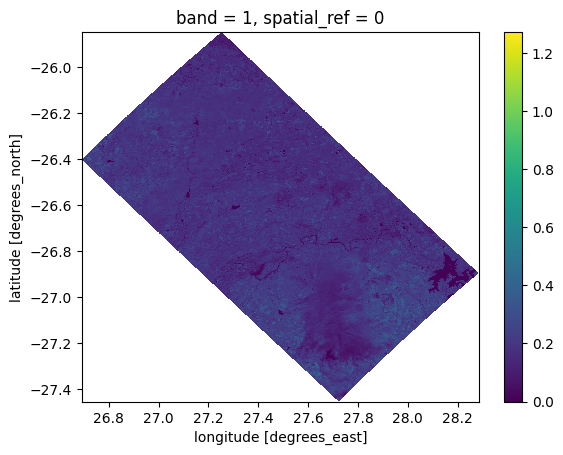

160


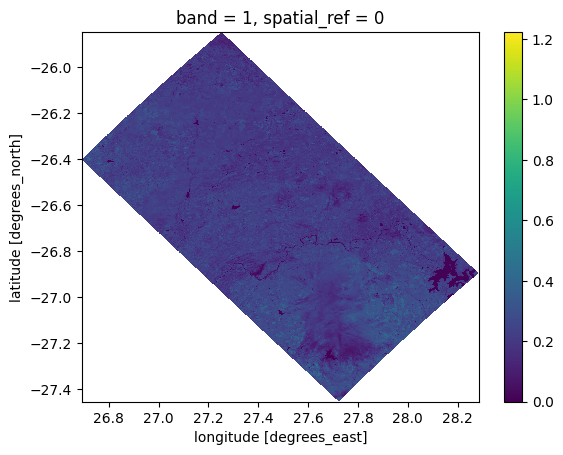

170


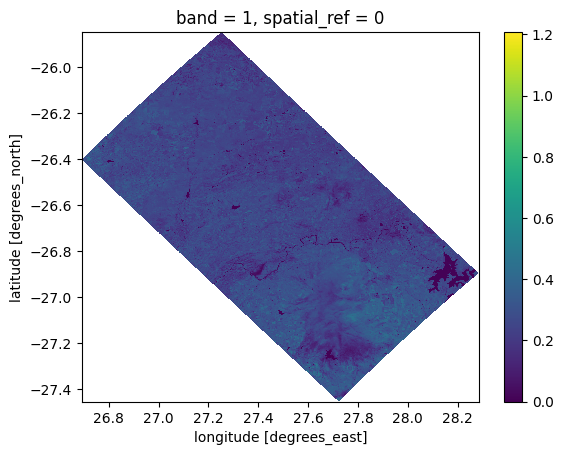

180


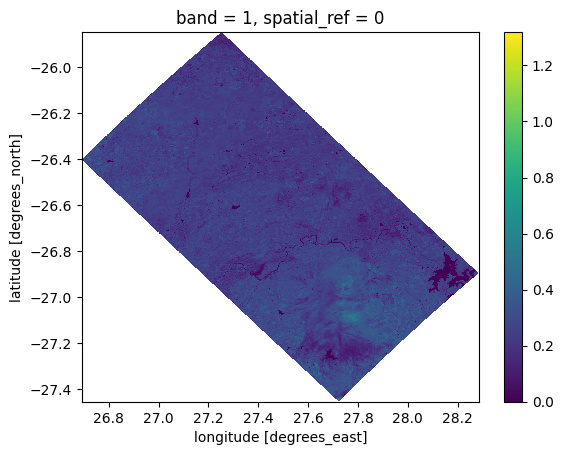

190


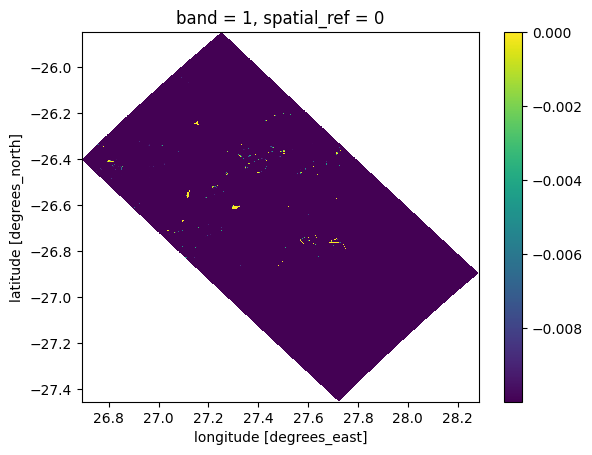

200


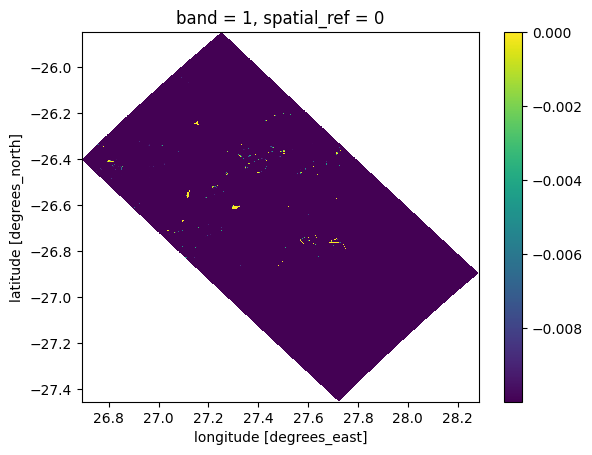

210


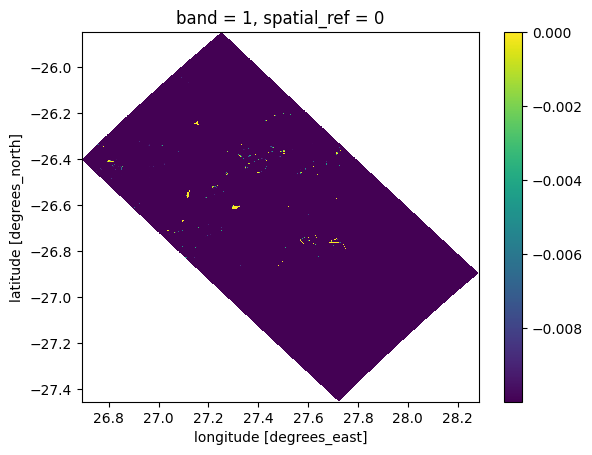

220


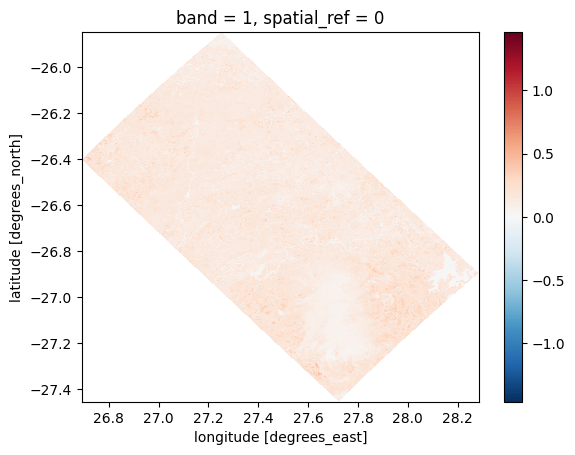

230


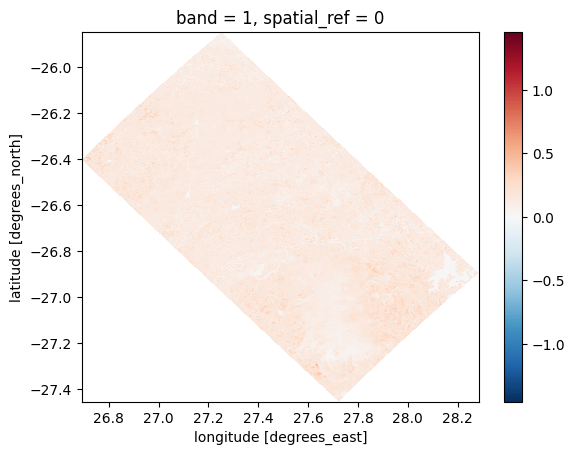

240


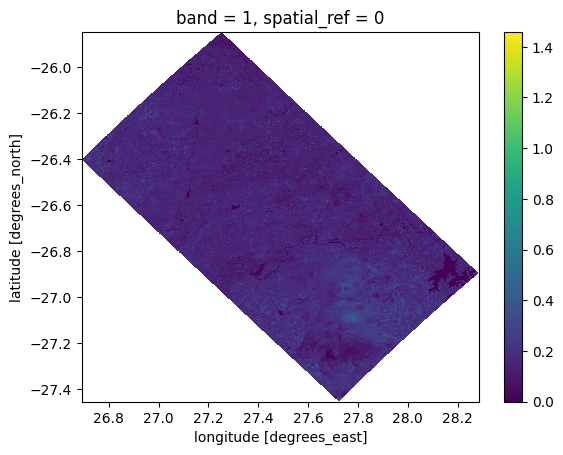

250


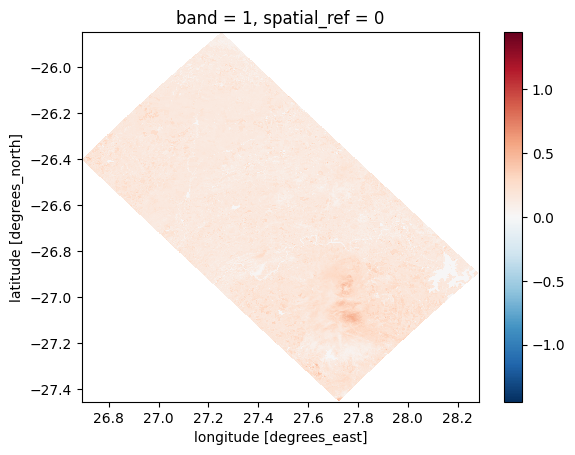

260


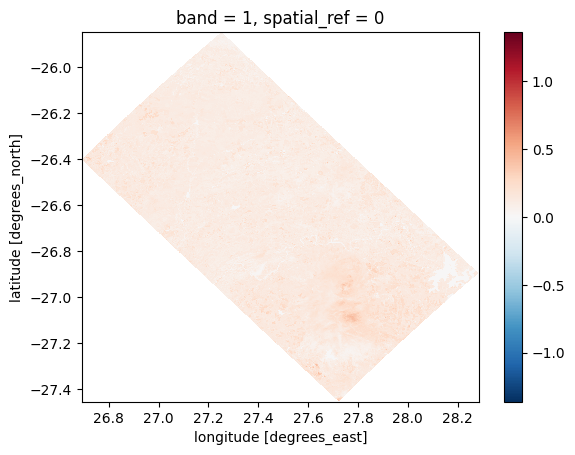

270


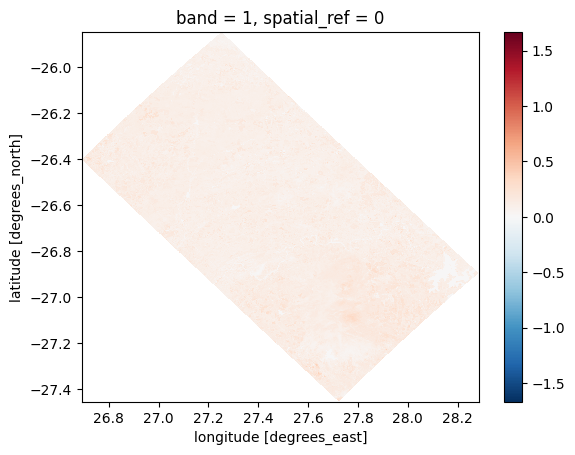

280


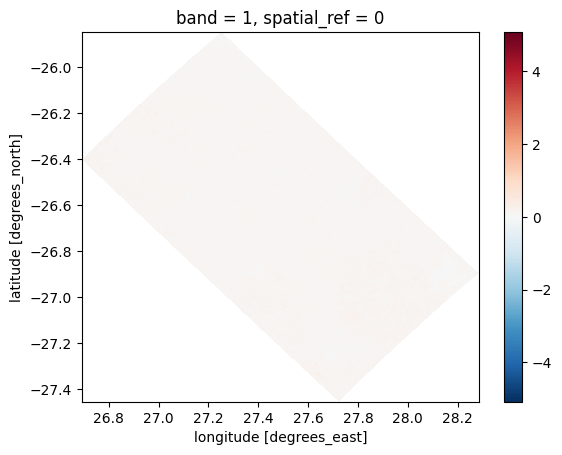

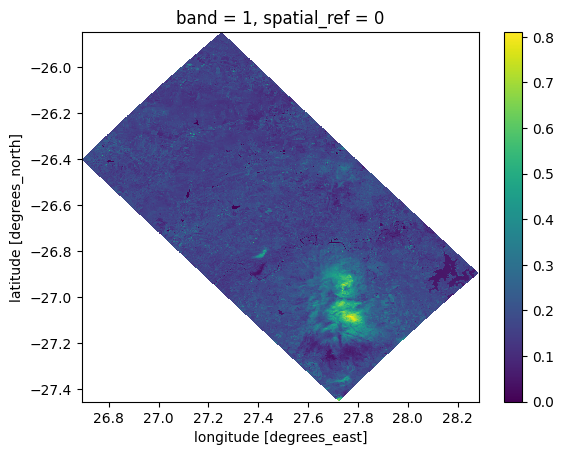

In [11]:
#for zero
mask_TC = landsat_emitCRS.where(landsat_emitCRS >= 0, 1, 0).where(landsat_emitCRS < 1, 1, 0)
band_numbers = ds_emit['bands'].data
emit_masked_TC = [None] * len(band_numbers)
for i in range(len(band_numbers)):
    #print status every 10 bands
    if (i % 10) == 0:
        print(i)
    emit_masked_TC[i] = ds_emit['reflectance'].sel(bands=i).data * mask_TC
    if (i % 10) == 0:
        plt.figure()
        emit_masked_TC[i].plot()
        plt.show()
emit_mask_v0 = ds_emit['reflectance'].sel(bands=50).data * mask_TC.rename({'x': 'longitude', 'y':'latitude'})
plt.figure()
emit_mask_v0.plot()
plt.show()

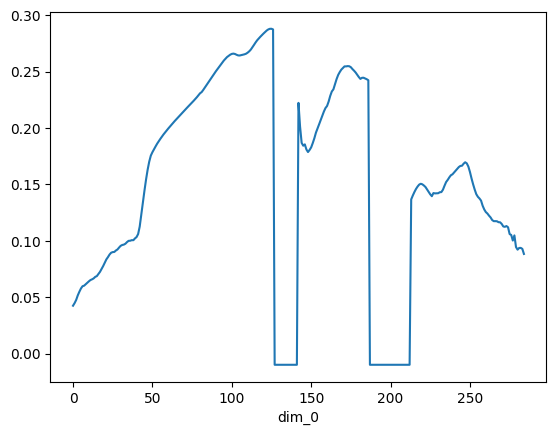

In [16]:
averages = [None] * len(band_numbers)
for i in range(len(band_numbers)):
    averages[i] = emit_masked_TC[i].mean()
averages_x = xr.DataArray(data = averages)
plt.figure()
averages_x.plot()
plt.show()

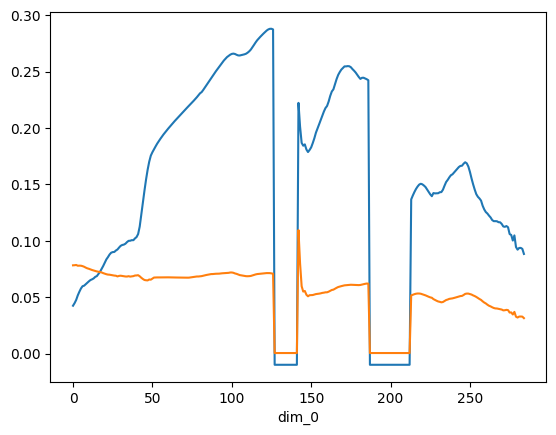

In [17]:
averages = [None] * len(band_numbers)
stds = [None] * len(band_numbers)
for i in range(len(band_numbers)):
    averages[i] = emit_masked_TC[i].mean()
    stds[i] = emit_masked_TC[i].std()
averages_x = xr.DataArray(data = averages)
stds_x = xr.DataArray(data = stds)

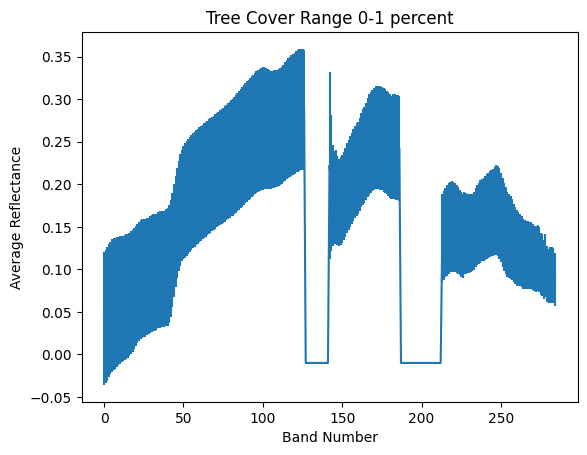

In [20]:
plt.figure()
plt.errorbar(band_numbers, averages_x, stds_x, linestyle='solid')
plt.xlabel("Band Number")
plt.ylabel("Average Reflectance")
plt.title("Tree Cover Range 0-1 percent")
plt.show()

1
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280


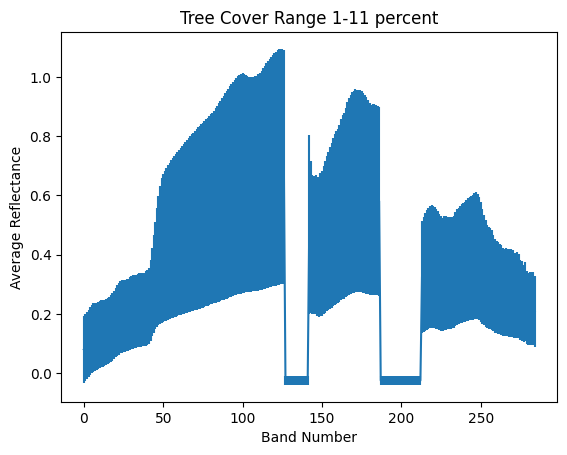

11
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280


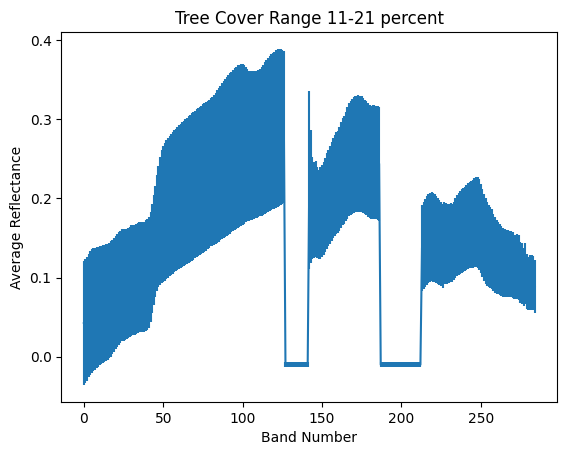

21
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280


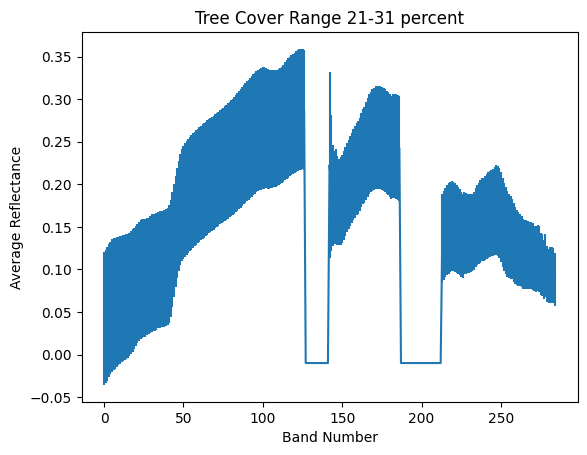

31
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280


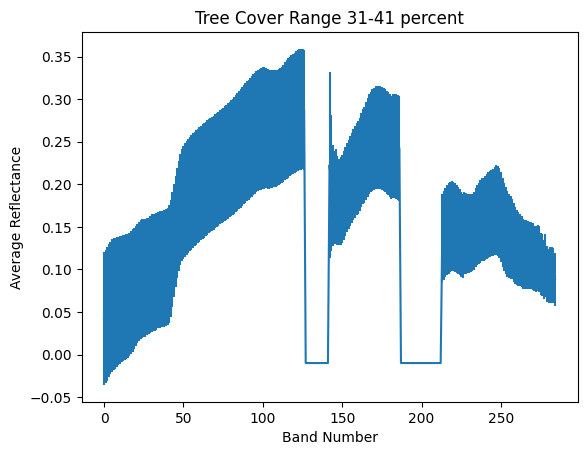

41
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280


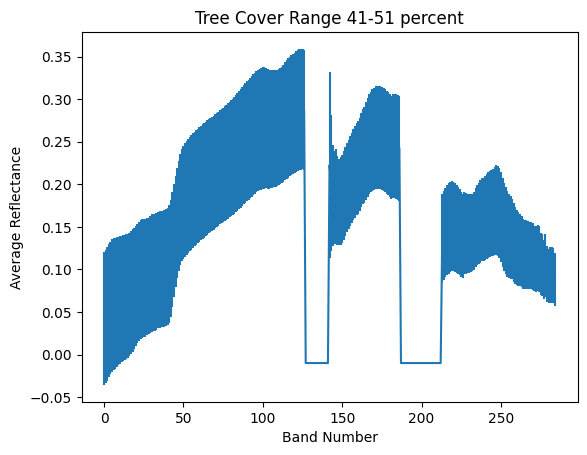

51
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280


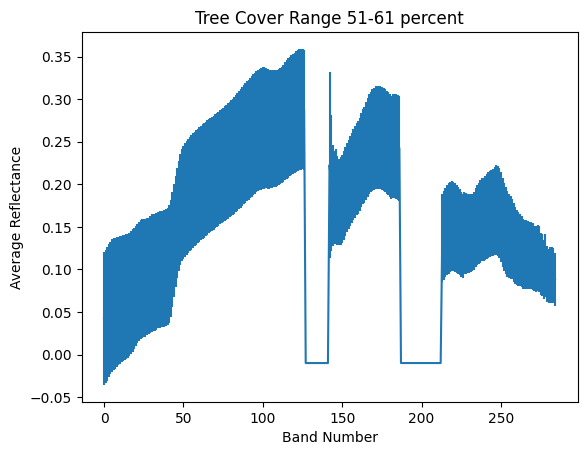

61
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280


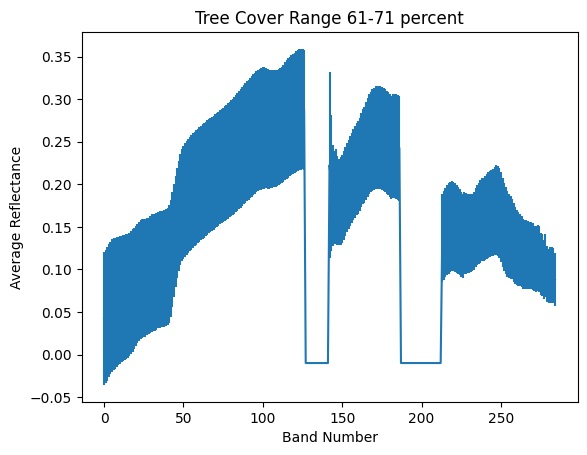

71
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280


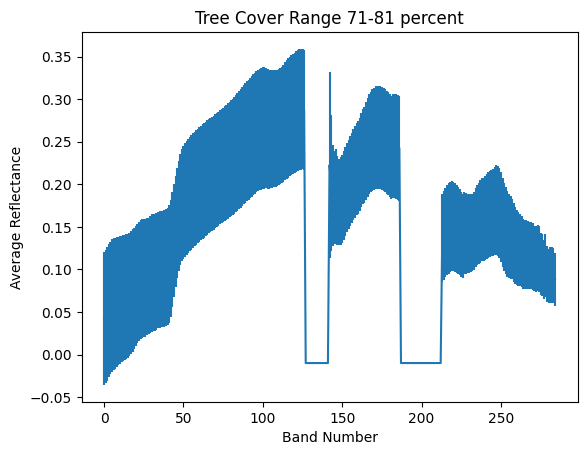

81
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280


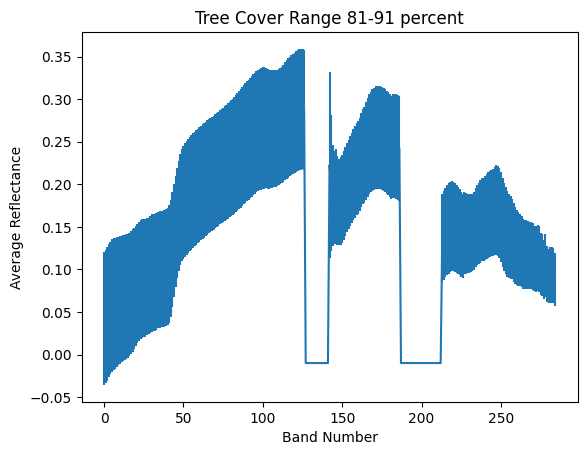

91
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280


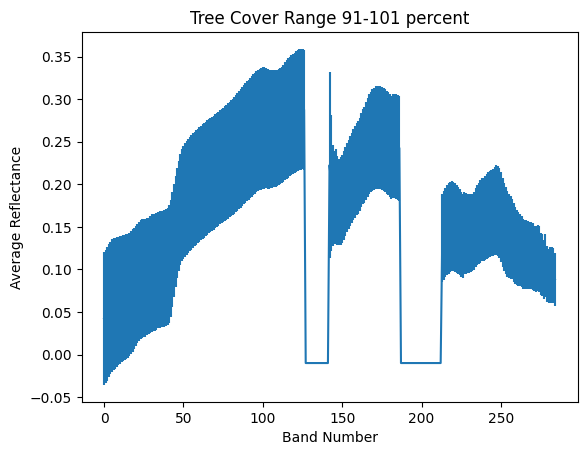

In [25]:
for x in range (1,101,10):
    print(x)
    #form mask for the specified level of tree cover
    mask_TC = landsat_emitCRS.where(landsat_emitCRS >= x, 1, 0).where(landsat_emitCRS < x+10, 1, 0)
    band_numbers = ds_emit['bands'].data
    emit_masked_TC = [None] * len(band_numbers)
    averages = [None] * len(band_numbers)
    stds = [None] * len(band_numbers)
    for i in range(len(band_numbers)):
        #print status every 10 bands
        if (i % 10) == 0:
            print(i)
        emit_masked_TC[i] = ds_emit['reflectance'].sel(bands=i).data * mask_TC
        averages[i] = emit_masked_TC[i].mean()
        stds[i] = emit_masked_TC[i].std()
    averages_x = xr.DataArray(data = averages)
    stds_x = xr.DataArray(data = stds)
    plt.figure()
    plt.errorbar(band_numbers, averages_x, stds_x, linestyle='solid')
    plt.xlabel("Band Number")
    plt.ylabel("Average Reflectance")
    plt.title("Tree Cover Range "+str(x)+"-"+str(x+10)+" percent")
    plt.show()